In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)  #y is weight, tx is [[1, x_0], [1, x_1], [1, x_2], ...]
                                     #ie tx = wo + w1d1 where w0=1 (linear regression)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    N = len(y)
    fx_n = tx.dot(w.T) #Multiple Linear Regression
    #L = 1/(2*N) * (sum((y-fx_n)**2))  #for MSE
    L = 1/N * (sum(np.absolute(y-fx_n))) #for MAE
    #print (L)
    return L

w = np.ones(2)
l = compute_loss(y,tx,w)
print (l)

72.2939220021


# Grid Search

Fill in the function `grid_search()` below:

In [7]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros(shape=(len(w0), len(w1)))  #matrix of all possible values of loss
    
    #w0 and w1 are already populated by grid_help.py :: generate_w
    for i0 in range(0,len(w0)):
        for i1 in range(0,len(w1)):
            weights = np.array([w0[i0], w1[i1]])
            losses[i0, i1] = compute_loss(y, tx, weights)

    return losses

Let us play with the grid search demo now!

Grid Search: loss*=4.443009009145566, w0*=72.72727272727272, w1*=13.636363636363626, execution time=13.062 seconds


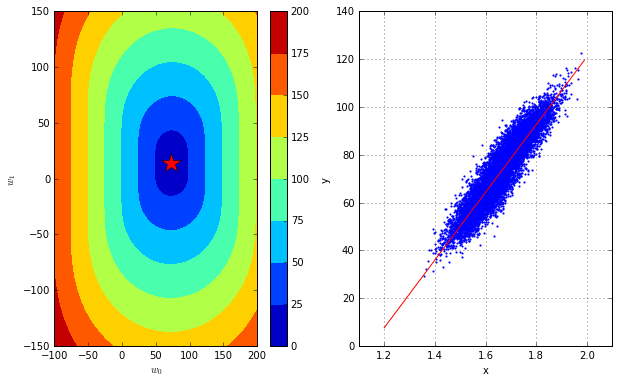

In [8]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [19]:
def compute_gradient(y, tx, w):
    N = len(y)
    """Compute the gradient."""
    #gradient is the derivate of L
    
    #MAE: L = 1/(2N) * (sum((y-fx_n)**2))
    G = 1/N * (y-tx.dot(w.T)).T.dot(tx)
    
    #MSE: L = 1/N * (sum(np.absolute(y-fx_n)))
    
    return G

Please fill in the functions `gradient_descent` below:

In [20]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        gradient = compute_gradient(y,tx,w)
        loss = compute_loss(y,tx,w)
        w = w + gamma*gradient
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [21]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4

# Initialization
w_initial = np.array([0.0, 0.0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

#Compare result by comparing loss with grid search approach!

Gradient Descent(0/49): loss=73.29392200210475, w0=29.317568800842015, w1=5.391884973995655
Gradient Descent(1/49): loss=43.97635320126308, w0=46.90811008134726, w1=8.627015958393
Gradient Descent(2/49): loss=26.38581192075793, w0=57.46243484965045, w1=10.5680945490314
Gradient Descent(3/49): loss=15.841491261622627, w0=63.79502971063234, w1=11.732741703414455
Gradient Descent(4/49): loss=9.715535690882227, w0=67.59458662722147, w1=12.431529996044297
Gradient Descent(5/49): loss=6.60508297830599, w0=69.87432077717496, w1=12.85080297162219
Gradient Descent(6/49): loss=5.245446847340479, w0=71.24216126714705, w1=13.10236675696893
Gradient Descent(7/49): loss=4.720759683380231, w0=72.06286556113031, w1=13.253305028176976
Gradient Descent(8/49): loss=4.5296289119300495, w0=72.55528813752026, w1=13.343867990901805
Gradient Descent(9/49): loss=4.4608717716901936, w0=72.85074168335424, w1=13.398205768536702
Gradient Descent(10/49): loss=4.43690057809716, w0=73.02801381085462, w1=13.4308084351

<function __main__.plot_figure>

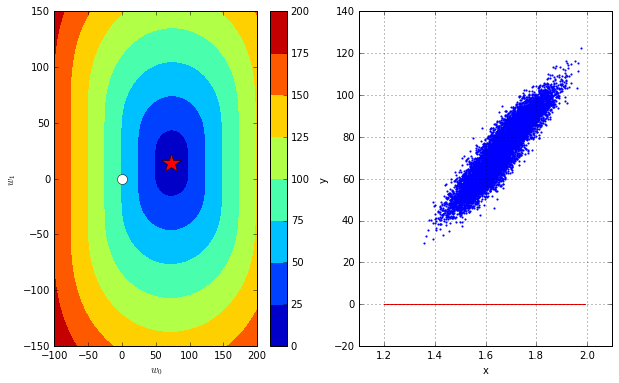

In [22]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [23]:
import random 

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    
    losses = []
    ws = []
    w = initial_w
    
    for it in range(0, max_iters):
        samples_indices = random.sample(range(len(y)), batch_size)
        samples_y =  []
        samples_tx = []
        
        for i in range(0, len(samples_indices)):
            samples_y.append(y[samples_indices[i]])
            samples_tx.append(tx[samples_indices[i],:]) #all columns of random row
            
        gradient = compute_gradient(np.asarray(samples_y), np.asarray(samples_tx), w) #compute gradient based on the samples
        loss = compute_loss(y,tx,w) #compute global loss
        w = w + gamma*gradient
        
        losses.append(loss)
        ws.append(w)
            
    return losses, ws

In [24]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 5 #len(y)

# Initialization
w_initial = np.array([0.0, 0.0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

print (gradient_losses)
print (gradient_ws)

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

[73.29392200210475, 43.29471236084639, 25.294529260274363, 14.771408118068317, 8.687328046194791, 6.0374926302667502, 4.5640496536886008, 4.5964046014991373, 4.477174359249096, 4.4270815356140343, 4.4411779517072434, 4.4288376462911341, 4.439414480572089, 4.6832331158779841, 4.6411046536455194, 4.7227883737319418, 4.535446053358509, 4.5020380208328135, 4.7815175821951303, 4.5978227654125563, 4.4850893751571386, 4.5063391904320813, 4.4563734198295393, 4.4341947692203005, 4.4303918408465774, 4.4677130369718556, 4.6010036341565126, 4.4547508193304433, 4.8839384015172138, 4.7196698987816337, 5.1139408664258355, 4.6560593002721875, 4.668303924160524, 4.4401480899380132, 4.4542720015657133, 4.5427123885632339, 4.7032236374923988, 4.5260342883864375, 4.4619517064536414, 4.6321456122667382, 5.1250115911997334, 4.4720151384148803, 4.4251993963046568, 4.4608850741629826, 4.4956534873446348, 4.812501934394235, 4.4774189201071515, 4.552115089246441, 4.5262051638759448, 4.5529260733014132]
[array([

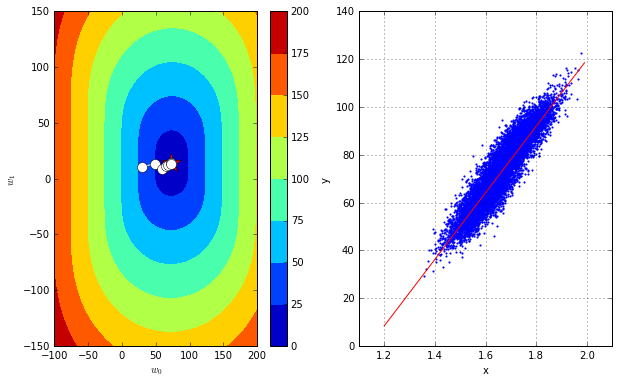

In [25]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))